In [12]:
# making buffers ! - first use geometric, later base on transport distance?

# First, load packages
import pandas as pd
import os
import numpy as np
import shapely as sp

import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
# only for jupyter nb to show plots inline
# %matplotlib inline 

#set wd
os.chdir("/Users/anayahall/projects/grapevine")
from scripts.fxns import epsg_meters

<function scripts.fxns.epsg_meters>

In [15]:
gdf_proj =  gpd.read_file("data/clean/clean_swis.shp")
# load census tract shapefile
# CA = gpd.read_file("data/raw/tl_2018_06_tract/tl_2018_06_tract.shp")
# LOAD COUNTY SHAPEFILE 
CA_proj = gpd.read_file("data/raw/CA_Counties/CA_Counties_TIGER2016.shp")
print(CA_proj.crs)
CA_proj.head()

{'init': 'epsg:3857'}


,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,POLYGON ((-13431319.75097945 4821511.426395644...
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,POLYGON ((-13490651.47641084 4680831.603393857...
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,(POLYGON ((-13423116.77225655 4042044.14856006...
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483353 4627725.227535474, ..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,(POLYGON ((-13317853.59433417 3931602.41399276...


In [17]:
CA = epsg_meters(CA_proj, proj = 3310)

CA.head()


# try plotting by size of facility
# gdf.head()
# gdf.cap_m3
# gdf.plot(marker = 'o', markersize = gdf.cap_m3/1000)
CA.crs

{'init': 'epsg:3310', 'no_defs': True}

In [7]:
# print("swis gdf crs: ",gdf.crs)

gdf_proj.head()
# CA.crs
# re-project

gdf = epsg_meters(gdf_proj)

gdf.plot()
gdf.head()

,index,SwisNo,Name,County,Location,Place,Latitude,Longitude,Category,Activity,Operationa,AcceptedWa,Throughput,Throughp_1,Capacity,CapacityUn,Acreage,RemainingC,cap_m3,geometry
0,0,01-AA-0310,Tri-Cities Rec. and Disp. CD Chip/Grind,Alameda,7010 Auto Mall Pkwy.,Fremont,37.49078,-121.99040,Transfer/Processing,Small Vol CD Wood Debris ChipGrind Op,Active,Wood waste,200.0,Tons/month,62369.0,Tons/year,90.0,None,106813.348981,POINT (-13579909.20966776 4507737.767278453)
1,1,27-AA-0090,Breien-Eade Compost Venture,Monterey,1 Pine Valley Road,San Ardo,36.12481,-121.00886,Composting,Composting Operation (Ag),Closed,"Agricultural,Manure",40000.0,Cu Yards/year,40000.0,Cu Yards/year,480.0,None,30582.200000,POINT (-13470644.67667453 4317808.653572722)
2,2,30-AB-0378,Golden Rain Foundation Composting Op.,Orange,24401 Moulton Parkway,Laguna Hills,33.60377,-117.72490,Composting,Composting Operation (Green Waste),Active,Green Materials,20.0,Tons/day,10000.0,Cu Yards/year,3.0,None,7645.550000,POINT (-13105075.92168905 3975721.298815021)
3,3,19-AR-5584,Dept. of Rec. & Parks Greenwaste Rec.,Los Angeles,5400 Griffith Park Dr,Los Angeles (City),34.11722,-118.27222,Composting,Chipping and Grinding Activity Fac./ Op.,Active,Green Materials,50.0,Tons/day,19750.0,Tons/year,3.0,None,33823.913200,POINT (-13166003.30539003 4044552.689329355)
4,4,28-AA-0002,Clover Flat Resource Recovery Park,Napa,4380 Silverado Trail Road,Calistoga,38.58400,-122.53400,Composting,Composting Facility (Other),Active,"Food Wastes,Green Materials",2500.0,Cubic Yards,2500.0,Cubic Yards,NaN,None,0.000000,POINT (-13640422.48486298 4662257.113558793)


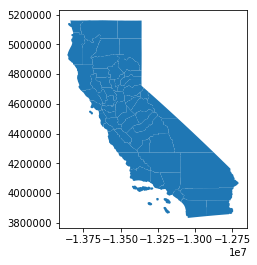

In [60]:
CA.plot()

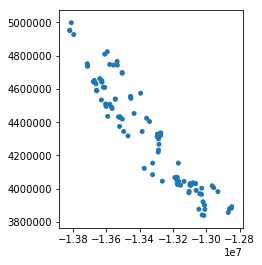

In [61]:
# add buffers - should be in meters now.....
gdf['buffers'] = gdf.buffer(15000)
# one degree is about 85km 
# buf = gdf.buffer(250)

gdf.set_geometry('buffers').plot()
# gdf.head()

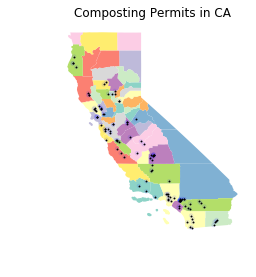

In [62]:
# # gdf.plot(s = 'buffers') 
f, ax = plt.subplots(1)
CA.plot(ax = ax, cmap='Set3', linewidth=0.1)
gdf.set_geometry('buffers').plot(ax = ax, color="blue", alpha="0.1")
gdf.set_geometry('geometry').plot(ax = ax, color="black", marker = '*', markersize= 1)
ax.axis('off')
ax.set_title('Composting Permits in CA', fontdict={'fontsize': '12', 'fontweight' : '3'})
plt.savefig("maps/CAwbuffers.png", dpi=300)

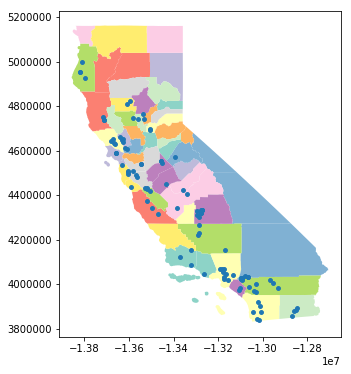

In [63]:
# attempt to nest plotting
gdf.plot(ax=CA.plot(cmap='Set3', figsize=(10, 6)), marker='o', markersize=15)
# ax.axis('off')
# ax.set_title('Composting Permits in CA', fontdict={'fontsize': '12', 'fontweight' : '3'})
# plt.savefig("maps/map_export.png", dpi=300)

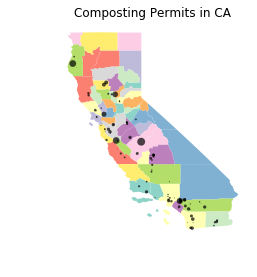

In [64]:
# better plot, with title
f, ax = plt.subplots(1)
CA.plot(ax = ax, cmap='Set3', figsize = (10,6), linewidth=0.1)
gdf.plot(ax = ax, markersize = gdf.cap_m3/10000, marker = 'o', color = 'black', alpha=.7, linewidth=0)
ax.axis('off')
ax.set_title('Composting Permits in CA', fontdict={'fontsize': '12', 'fontweight' : '3'})
plt.savefig("maps/FacilitiesbyCapacity.png", dpi=300)